mu = [-27.02    3.57    8.191   9.898   9.898   9.945]
standard deviation:
                           x = -27.02      x = 3.57  x = 8.191     x = 9.898  \
mu = -27.01999999999995  4.973799e-14  3.059000e+01     35.211  3.691800e+01   
mu = 3.57000000000005    3.059000e+01  5.018208e-14      4.621  6.328000e+00   
mu = 8.191               3.521100e+01  4.621000e+00      0.000  1.707000e+00   
mu = 9.898000000000012   3.691800e+01  6.328000e+00      1.707  1.243450e-14   
mu = 9.898000000003284   3.691800e+01  6.328000e+00      1.707  3.284484e-12   
mu = 9.945               3.696500e+01  6.375000e+00      1.754  4.700000e-02   

                         x = 9.603  x = 9.945  x = 10.056  
mu = -27.01999999999995     36.623     36.965      37.076  
mu = 3.57000000000005        6.033      6.375       6.486  
mu = 8.191                   1.412      1.754       1.865  
mu = 9.898000000000012       0.295      0.047       0.158  
mu = 9.898000000003284       0.295      0.047       0.158  
mu =

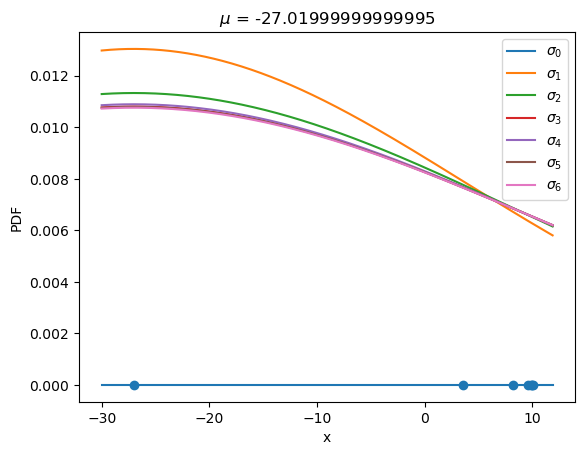

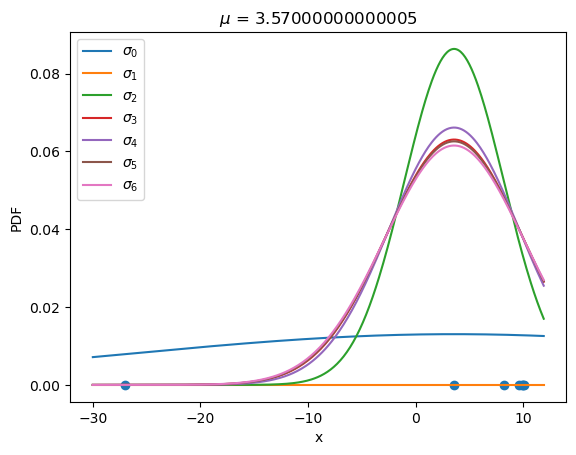

/home/draco/anaconda3/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1870: RuntimeWarning: divide by zero encountered in true_divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


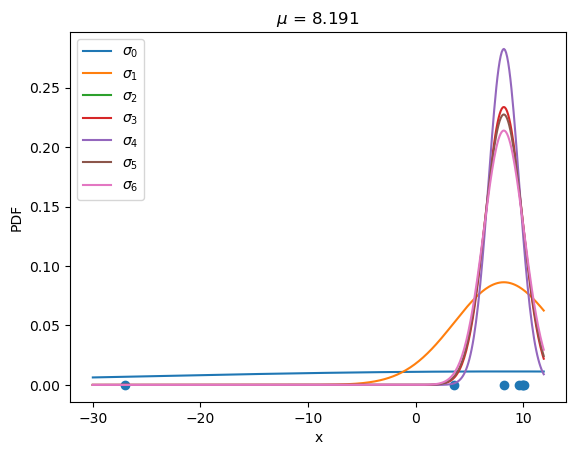

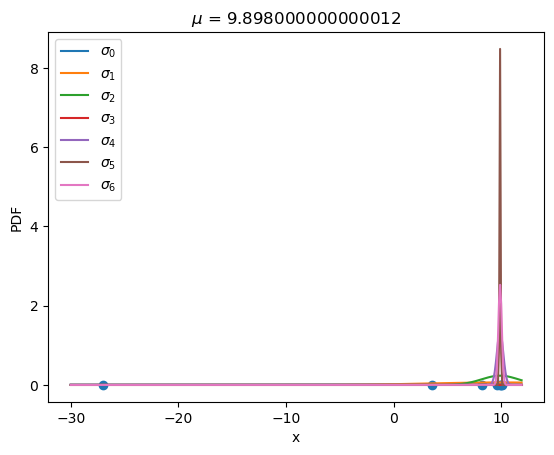

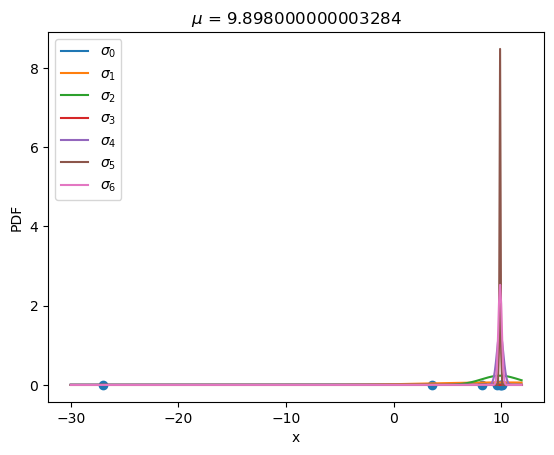

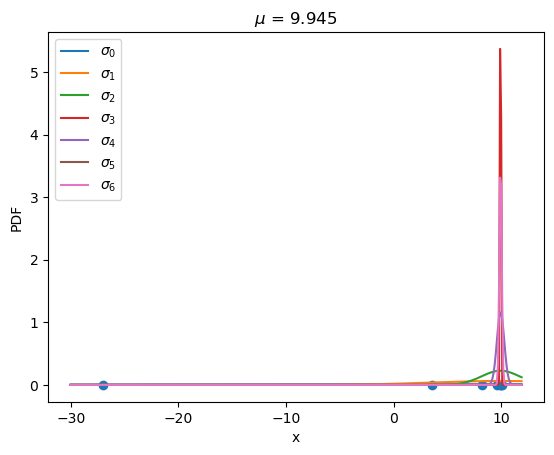

In [12]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st

def seven(x,mu,sigma):
  P=st.norm.pdf(x,loc=mu,scale=sigma)
  return P

def f(x,mu):
  r=0.
  for i in range(len(x)):
    r+=1./(mu-x[i])
  return r

def der(x,mu):
  r=0.
  for i in range(len(x)):
    r+=1./(x[i]-mu)**2.
  return r

eps=1e-6
x=np.array([-27.020,3.570,8.191,9.898,9.603,9.945,10.056])
mu=np.array([-25.,4.,8.50,9.7,9.92,10.])
for j in range(len(mu)):
  mu_old=30.
  while np.linalg.norm(mu[j]-mu_old)>=eps:
    mu_old=np.copy(mu[j])
    mu[j]-=f(x,mu[j])/der(x,mu[j])
print('mu =',mu)

sigma=np.zeros([len(mu),len(x)])
for i in range(len(mu)):
  for j in range(len(x)):
    sigma[i,j]=np.linalg.norm(x[j]-mu[i])

sigma2=np.copy(sigma)
sigma=pd.DataFrame(sigma, columns=[f'x = {x[0]}', f'x = {x[1]}', f'x = {x[2]}', f'x = {x[3]}', f'x = {x[4]}', f'x = {x[5]}', f'x = {x[6]}'], index=[f'mu = {mu[0]}', f'mu = {mu[1]}', f'mu = {mu[2]}', f'mu = {mu[3]}', f'mu = {mu[4]}', f'mu = {mu[5]}'])
xplot=np.arange(-30.,12.,0.1)

print('standard deviation:')
print(sigma)

for i in range(len(mu)):
  for j in range(len(x)):
    plt.plot(xplot, like_seven(xplot,mu[i],sigma[f'x = {x[j]}'][f'mu = {mu[i]}']),label=f'$\sigma_{j}$')
  plt.legend()
  plt.scatter(x, np.zeros(len(x),float),label='data points')
  plt.title(f'$\mu$ = {mu[i]}')
  plt.xlabel('x')
  plt.ylabel('PDF')
  plt.show()

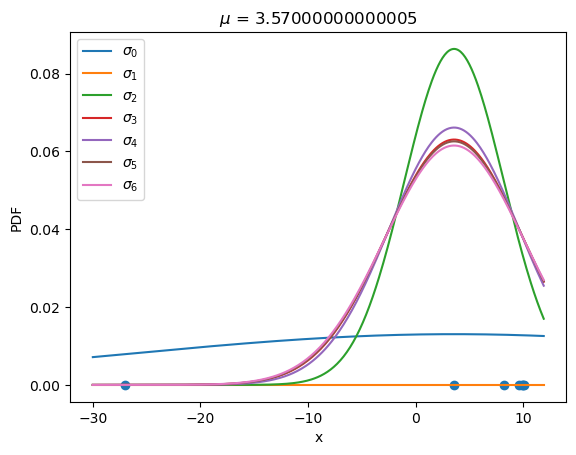

In [13]:

for j in range(len(x)):
    plt.plot(xplot, fun(xplot,mu[1],sigma[f'x = {x[j]}'][f'mu = {mu[1]}']),label=f'$\sigma_{j}$')
plt.legend()
plt.scatter(x, np.zeros(len(x),float),label='data points')
plt.title(f'$\mu$ = {mu[1]}')
plt.xlabel('x')
plt.ylabel('PDF')
plt.show()